<a href="https://colab.research.google.com/github/KimRass/Programming/blob/master/Data%20Science/Machine%20Learning/Time%20Series/NYC%20Taxi%20%26%20TadGAN%20(Anomaly%20Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data Science/Machine Learning/Time Series/NYC Taxi & TadGAN (Anomaly Detection).ipynb
!pip uninstall -y keras-nightly tensorflow
!pip install orion-ml "urllib3>=1.25.4, <1.26"

Found existing installation: tensorflow 2.7.0
Uninstalling tensorflow-2.7.0:
  Successfully uninstalled tensorflow-2.7.0
     |████████████████████████████████| 110 kB 5.4 MB/s 
     |████████████████████████████████| 127 kB 47.6 MB/s 
     |████████████████████████████████| 2.9 MB 38.9 MB/s 
     |████████████████████████████████| 5.4 MB 24.4 MB/s 
     |████████████████████████████████| 149 kB 48.4 MB/s 
     |████████████████████████████████| 180 kB 53.5 MB/s 
     |████████████████████████████████| 2.5 MB 43.6 MB/s 
     |████████████████████████████████| 508 kB 43.0 MB/s 
     |████████████████████████████████| 377 kB 35.0 MB/s 
     |████████████████████████████████| 10.1 MB 23.8 MB/s 
     |████████████████████████████████| 17.3 MB 320 kB/s 
     |████████████████████████████████| 107 kB 49.4 MB/s 
     |████████████████████████████████| 85 kB 3.3 MB/s 
     |████████████████████████████████| 50 kB 5.5 MB/s 
     |████████████████████████████████| 1.5 MB 44.8 MB/s 
     |███████

- Restart runtime

In [1]:
!pip freeze | grep orion-ml

%%bash
rm -rf Orion
rm -rf images

git clone https://github.com/signals-dev/Orion.git
mv Orion/tutorials/tulog/* .
exit

orion-ml==0.2.0


In [83]:
# https://analyticsindiamag.com/hands-on-guide-to-tadgan-with-python-codes/ 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from orion import Orion
from orion.data import load_signal, load_anomalies
from orion.primitives.tadgan import TadGAN, score_anomalies
from orion.primitives.timeseries_anomalies import find_anomalies
from utils import plot, plot_ts, plot_rws, plot_error, unroll_ts
from model import hyperparameters

plt.style.use("dark_background")

In [5]:
signal = "nyc_taxi"
raw_data = load_signal(signal)
known_anoms = load_anomalies(signal)

In [6]:
known_anoms

,start,end
0,1414679400,1415050200
1,1416913200,1417284000
2,1419330600,1419701400
3,1419885000,1420255800
4,1422127800,1422498600


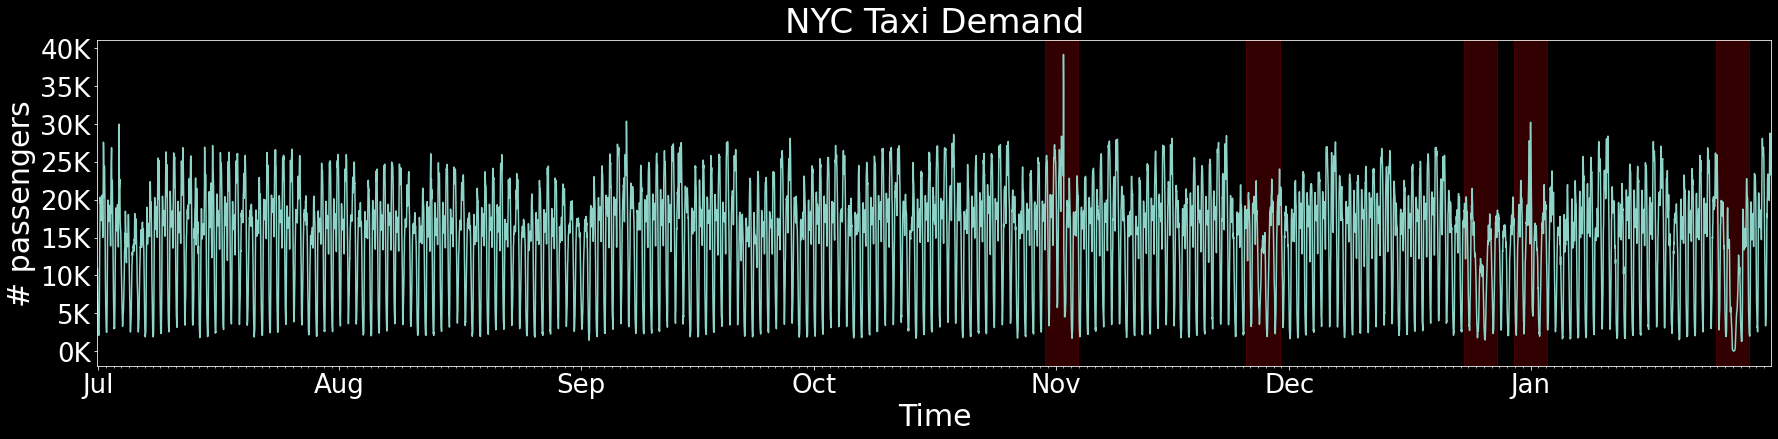

In [7]:
# This function plots time series and highlights anomalous regions.
# The first anomaly in `anomalies` is considered the ground truth.
plot(raw_data, anomalies=known_anoms);

In [11]:
# The model is specified in `tadgan.json`.
# orion = Orion(pipeline="/content/drive/MyDrive/Time Series/tadgan.json")
orion = Orion(pipeline="tadgan.json")
# To train the model on the data, we simply use the `orion.fit()` method.
# To do anomaly detection, we use the `orion.detect()` method.
# In our case, we want to fit the data and then perform detection; therefore we use the `orion.fit_detect()` method.
detected_anoms = orion.fit_detect(raw_data)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch: 1/5, [Dx loss: [-0.6338712  -3.1177766   1.6498169   0.08340888]] [Dz loss: [-3.7954967   0.07525039 -5.28487     0.1414123 ]] [G loss: [11.975645   -1.6448257  12.006479    0.16139914]]
Epoch: 2/5, [Dx loss: [-1.0625037  -6.232884    4.978273    0.01921069]] [Dz loss: [-39.83148      0.4890127  -42.1376       0.18170992]] [G loss: [58.16762    -4.9139833  61.633945    0.14476654]]
Epoch: 3/5, [Dx loss: [-0.8969581  -4.010481    2.9242215   0.01893011]] [Dz loss: [-158.94072      2.1607842 -166.59285      0.5491366]] [G loss: [ 1.9531688e+02 -2.9376633e+00  1.9695247e+02  1.3020888e-01]]
Epoch: 4/5, [Dx loss: [-0.8382573  -6.5922184   5.594161    0.01598009]] [Dz loss: [-78.68549     2.7775009 -95.76247     1.4299451]] [G loss: [101.23696     -5.3855963  105.20123      0.14213501]]
Epoch: 5/5, [Dx loss: [-5.7085234e-01 -1.4111800e+01  1.3432230e+01  1.0871630e-02]] [Dz loss: [ 3.3254583   2.896503   -4.6413665   0.50703204]] [G loss: [ -7.2285924 -13.508034    4.910043    0.1369

In [12]:
detected_anoms

,start,end,severity
0,1404165600,1404289800,0.515857
1,1409781600,1410150600,0.314634
2,1410476400,1410753600,0.266293
3,1413502200,1413691200,0.120146
4,1414715400,1414904400,0.068567
5,1419553800,1419748200,0.206606
6,1422118800,1422513000,0.677359


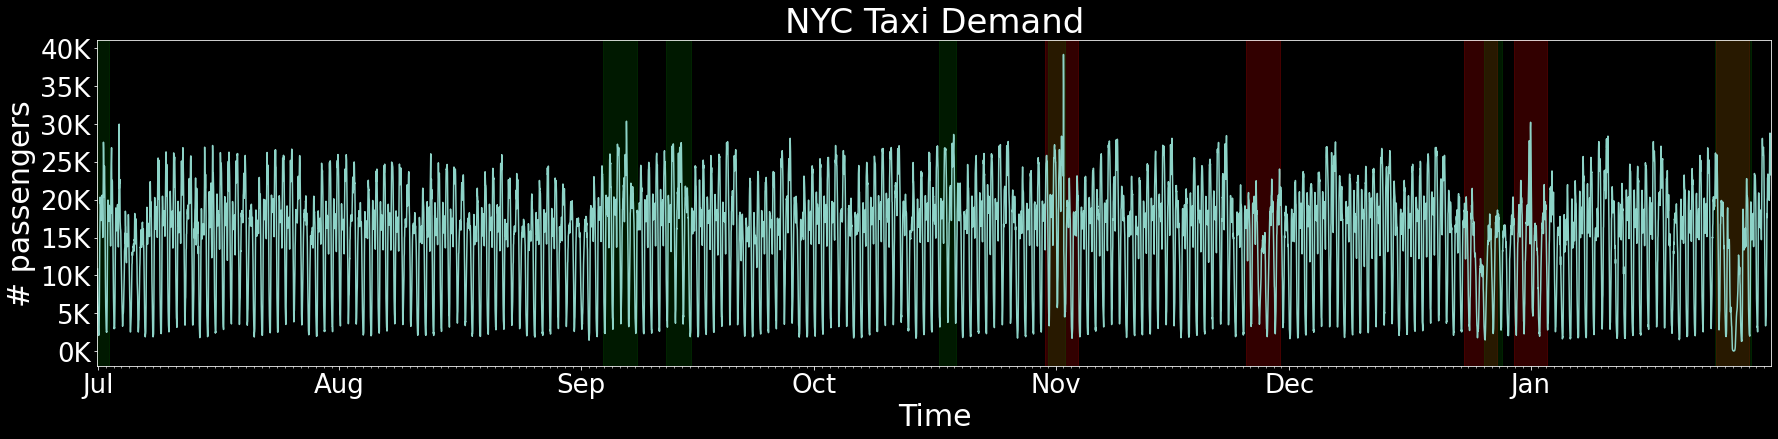

In [14]:
plot(raw_data, anomalies=[known_anoms, detected_anoms])

In [33]:
# `interval`: An interger that refers to the time span to compute aggregation of.
# `time_column`: Column of `X` that contains time values.
# `method`: What aggregation method should be used to compute the value, by default this set to the mean.
def time_segments_aggregate(X, interval, time_column, method=["mean"]):
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X)
    X = X.sort_values(time_column).set_index(time_column)

    if isinstance(method, str):
        method = [method]

    start_ts = X.index.values[0]
    max_ts = X.index.values[-1]
    values = list()
    index = list()
    while start_ts <= max_ts:
        end_ts = start_ts + interval
        subset = X.loc[start_ts:end_ts - 1]
        aggregated = [getattr(subset, agg)(skipna=True).values for agg in method]
        values.append(np.concatenate(aggregated))
        index.append(start_ts)
        start_ts = end_ts
    return np.asarray(values), np.asarray(index)

# 30 minutes == 1800 seconds.
data, index = time_segments_aggregate(raw_data, interval=1800, time_column="timestamp")

In [35]:
# Data Imputation
imp = SimpleImputer()
data = imp.fit_transform(data)

# Feature Scaling
sc = MinMaxScaler(feature_range=(-1, 1))
data = sc.fit_transform(data)

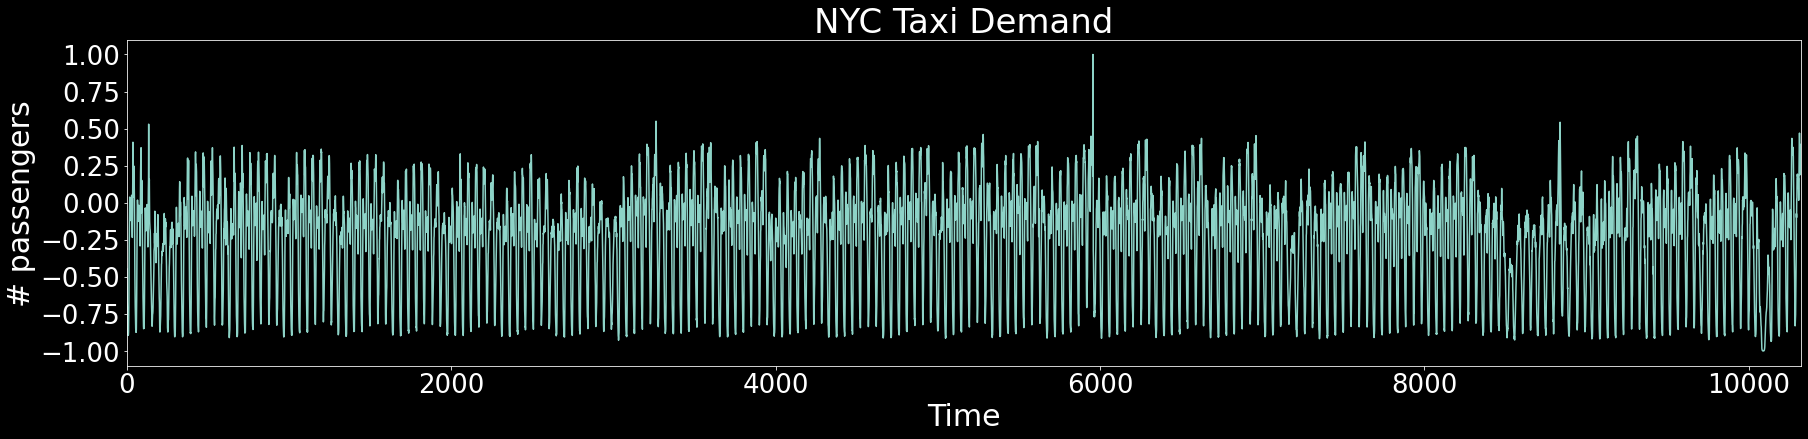

In [36]:
# `label`: Label for the legend.
plot_ts(data)

In [74]:
# Blocked CV
def rolling_window_sequences(X, index, window_size, target_size, step_size, target_column, drop=None, drop_windows=False):
    out_X = list()
    out_y = list()
    X_index = list()
    y_index = list()
    target = X[:, target_column]

    if drop_windows:
        if hasattr(drop, '__len__') and (not isinstance(drop, str)):
            if len(drop) != len(X):
                raise Exception('Arrays `drop` and `X` must be of the same length.')
        else:
            if isinstance(drop, float) and np.isnan(drop):
                drop = np.isnan(X)
            else:
                drop = X == drop

    start = 0
    max_start = len(X) - window_size - target_size + 1
    while start < max_start:
        end = start + window_size

        if drop_windows:
            drop_window = drop[start:end + target_size]
            to_drop = np.where(drop_window)[0]
            if to_drop.size:
                start += to_drop[-1] + 1
                continue

        out_X.append(X[start:end])
        out_y.append(target[end:end + target_size])
        X_index.append(index[start])
        y_index.append(index[end])
        start = start + step_size

    return np.asarray(out_X), np.asarray(out_y), np.asarray(X_index), np.asarray(y_index)

X, y, X_index, y_index = rolling_window_sequences(data, index, window_size=100, target_size=1, step_size=1, target_column=0)

In [75]:
print("Training data input shape: {}".format(X.shape))
print("Training data index shape: {}".format(X_index.shape))
print("Training y shape: {}".format(y.shape))
print("Training y index shape: {}".format(y_index.shape))

Training data input shape: (10222, 100, 1)
Training data index shape: (10222,)
Training y shape: (10222, 1)
Training y index shape: (10222,)


# Modeling
- The architecture of the model requires four neural networks:
    - `encoder`: maps `X` to its latent representation `Z`.
    - `generator`: maps the latent variable `Z` back to `X`, which we will denote later on as `X_hat`.
    - `criticX`: discriminates between `X` and `generator(Z)` or `X_hat`.
    - `criticZ`: discriminates between `Z` and `encoder(X)`.
- 
To use the `TadGAN` model, we specify a number of parameters including the model layers (structure of the previously mentioned neural networks). We also specify the input dimensions, the number of epochs, the learning rate, etc. All the parameters are listed below.

In [80]:
hyperparameters["epochs"] = 10
hyperparameters["shape"] = (X.shape[1], X.shape[2])
hyperparameters["optimizer"] = "keras.optimizers.Adam"
hyperparameters["learning_rate"] = 0.0005
hyperparameters["latent_dim"] = 20
hyperparameters["batch_size"] = 64

display(hyperparameters)

{'batch_size': 64,
 'encoder_reshape_shape': None,
 'epochs': 10,
 'generator_reshape_dim': None,
 'generator_reshape_shape': None,
 'input_shape': (100, 1),
 'latent_dim': 20,
 'layers_critic_x': [{'class': 'keras.layers.Conv1D',
   'parameters': {'filters': 64, 'kernel_size': 5}},
  {'class': 'keras.layers.advanced_activations.LeakyReLU',
   'parameters': {'alpha': 0.2}},
  {'class': 'keras.layers.Dropout', 'parameters': {'rate': 0.25}},
  {'class': 'keras.layers.Conv1D',
   'parameters': {'filters': 64, 'kernel_size': 5}},
  {'class': 'keras.layers.advanced_activations.LeakyReLU',
   'parameters': {'alpha': 0.2}},
  {'class': 'keras.layers.Dropout', 'parameters': {'rate': 0.25}},
  {'class': 'keras.layers.Conv1D',
   'parameters': {'filters': 64, 'kernel_size': 5}},
  {'class': 'keras.layers.advanced_activations.LeakyReLU',
   'parameters': {'alpha': 0.2}},
  {'class': 'keras.layers.Dropout', 'parameters': {'rate': 0.25}},
  {'class': 'keras.layers.Conv1D',
   'parameters': {'filter

In [82]:
tgan = TadGAN(**hyperparameters)
tgan.fit(X=X, y=X)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected

Epoch: 1/10, [Dx loss: [-1.4285988  -3.1770456   1.001029    0.07474184]] [Dz loss: [-0.5724612  -1.2461454  -0.6287586   0.13024424]] [G loss: [ 2.3576615  -0.97306436  1.5927197   0.1738006 ]]
Epoch: 2/10, [Dx loss: [-1.4761153  -5.8341966   4.127472    0.02306103]] [Dz loss: [-3.4755323  -1.856682   -2.829962    0.12111124]] [G loss: [ 0.9148665  -4.1478176   3.4910202   0.15716639]]
Epoch: 3/10, [Dx loss: [-0.7140143  -4.964902    4.1082187   0.01426676]] [Dz loss: [-1.4034032 -0.4296075 -1.4961338  0.0522338]] [G loss: [-1.078787   -4.0684056   2.0791984   0.09104203]]
Epoch: 4/10, [Dx loss: [-0.6804359  -5.5158467   4.706243    0.01291687]] [Dz loss: [-2.6620436  1.6483269 -6.045361   0.1734992]] [G loss: [ 4.3743067  -4.741472    8.098493    0.10172848]]
Epoch: 5/10, [Dx loss: [-5.2214897e-01 -1.2177657e+01  1.1538425e+01  1.1708469e-02]] [Dz loss: [ 0.498056   1.5261867 -1.3643728  0.0336242]] [G loss: [ -9.294049   -11.549705     1.5426948    0.07129574]]
Epoch: 6/10, [Dx loss

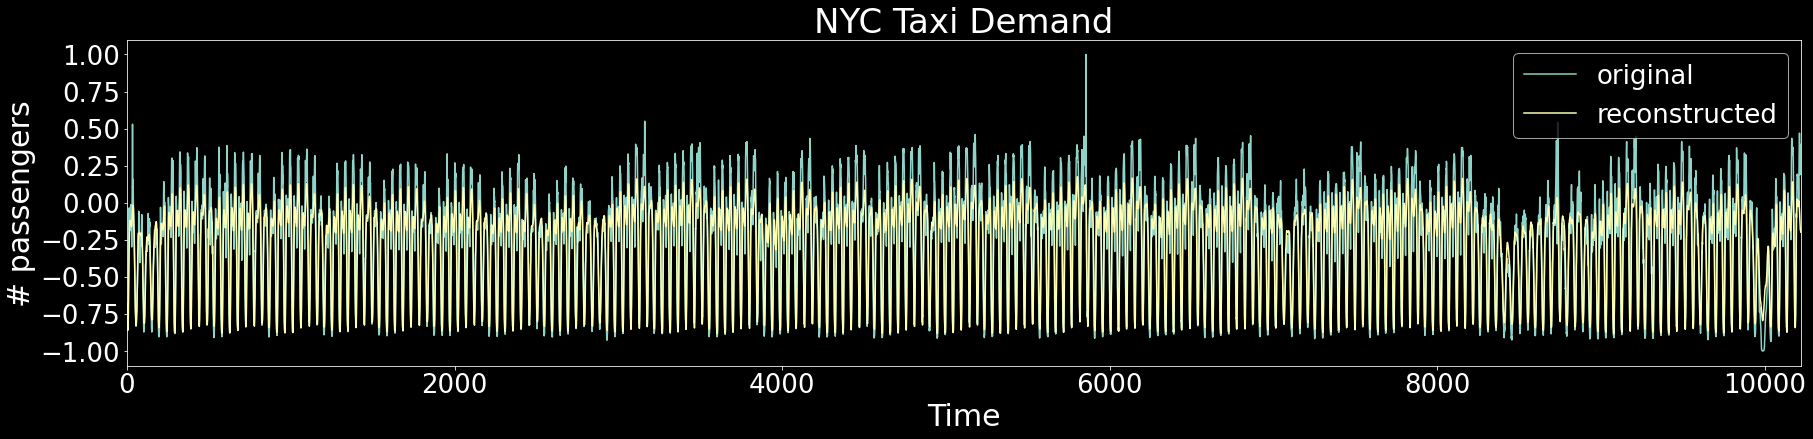

In [92]:
# Reconstruct
X_hat, critic = tgan.predict(X=X, y=X)
# To reassemble or "unroll" the predicted signal `X_hat` we can choose different aggregation methods (e.g., mean, max, etc). In our implementation, we chose it to as the median value.
# flatten the predicted windows
y_hat = unroll_ts(X_hat)

plot_ts([y, y_hat], labels=["original", "reconstructed"])

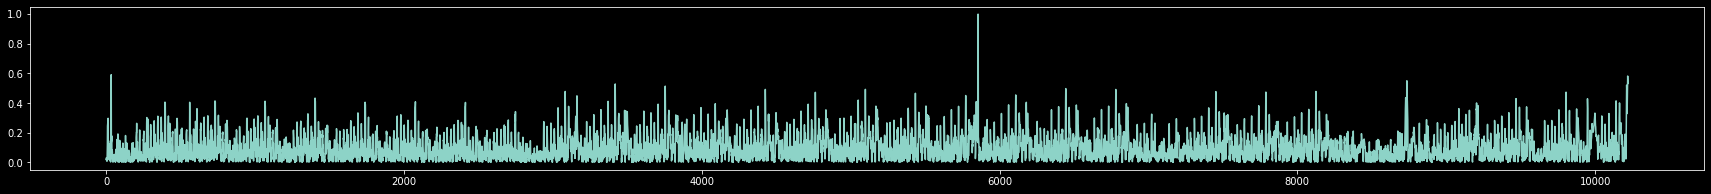

In [93]:
# pair-wise error calculation
error = np.zeros(shape=y.shape)
length = y.shape[0]
for i in range(length):
    error[i] = abs(y_hat[i] - y[i])

# The higher the error, the more likely it is an anomaly.
fig = plt.figure(figsize=(30, 3))
plt.plot(error);

# Error Computation
- In the `TadGAN` pipeline, we use `tadgan.score_anomalies` to perform error calculation for us. It is a smoothed error function that uses a window based method to smooth the curve then uses either: area, point difference, or dtw as a measure of discrepancy.

## Area
- This method captures the general shape of the orignal and reconstructed signal and then compares them together. 
- <img src="https://raw.githubusercontent.com/sintel-dev/Orion/e48569fc7796f569615e069d95114bdd2d37623f/tutorials/tulog/images/area.png" alt="Drawing" width="300"/>

## Point
- This method applies a point-to-point comparison between the original and reconstructed signal. It is considered a strict approach that does not allow for many mistakes.
- <img src="https://raw.githubusercontent.com/sintel-dev/Orion/e48569fc7796f569615e069d95114bdd2d37623f/tutorials/tulog/images/point.png" alt="Drawing" width="180"/>

## DTW
- A more lenient method yet very effective is Dynamic Time Warping (DTW). It compares two signals together using any pair-wise distance measure but it allows for one signal to be lagging behind another.
- <img src="https://raw.githubusercontent.com/sintel-dev/Orion/e48569fc7796f569615e069d95114bdd2d37623f/tutorials/tulog/images/dtw.png" alt="Drawing" width="400"/>

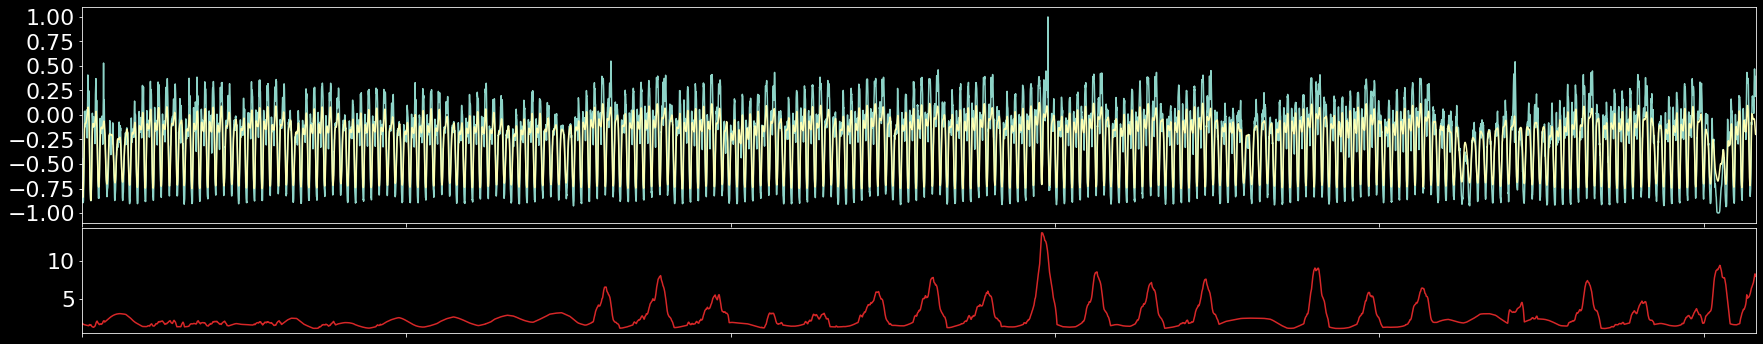

In [100]:
error, true_index, true, pred = score_anomalies(X, X_hat, critic, X_index, rec_error_type="dtw", comb="mult")
pred = np.array(pred).mean(axis=2)

plot_error([[true, pred], error])

In [101]:
thr = 10
intervals = list()
i = 0
max_start = len(error)
while i < max_start:
    j = i
    start = index[i]
    while error[i] > thr:
        i += 1
    end = index[i]
    if start != end:
        intervals.append((start, end, np.mean(error[j: i+1])))
    i += 1
        
display(intervals)

[(1414798200, 1414893600, 12.409945238553458)]

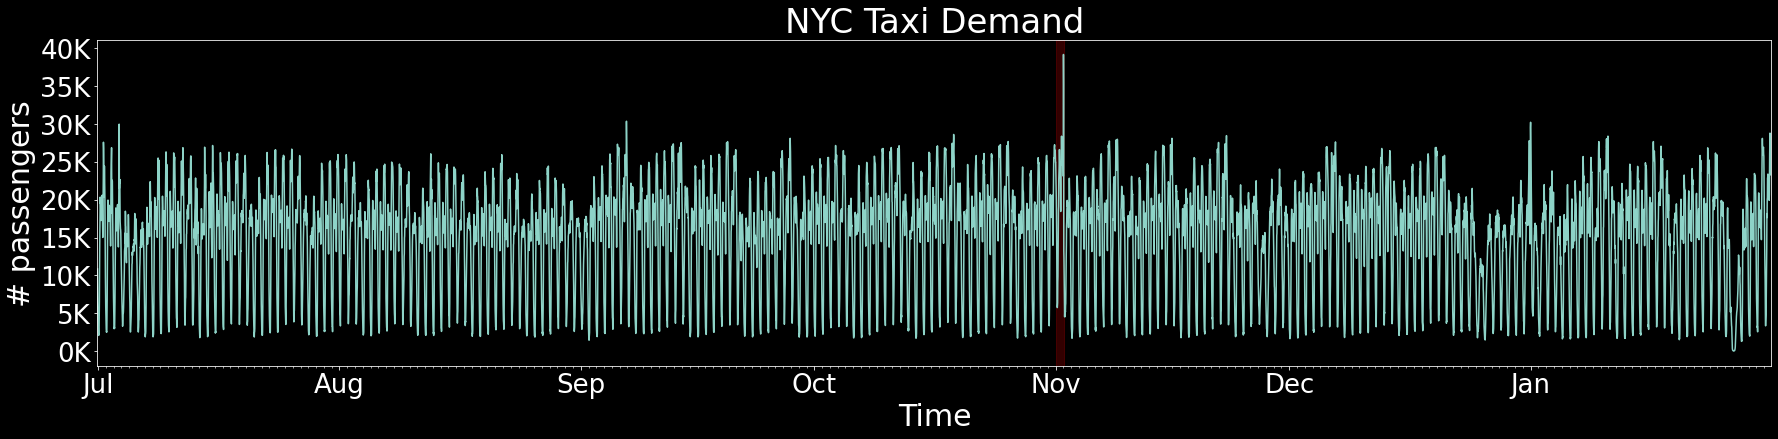

In [105]:
anoms = pd.DataFrame(intervals, columns=["start", "end", "score"])

# plot(raw_data, anomalies=[known_anoms, anoms])
plot(raw_data, anomalies=[anoms])

While a fixed threshold raised two correct anomalies, it missed out on the other three. If we were to look back at the error plot, we notice that some deviations are abnormal within its local region. So how can we incorporate this information in our thresholding technique? We can use window based methods to detect anomalies with respect to their context.

We first define the window of errors, that we want to analyze. We then find the anomalous
sequences in that window by looking at the mean and standard deviation of the errors in the window.
We store the start/stop index pairs that correspond to each sequence, along with its score. 
We then move the window and repeat the procedure.
Lastly, we combine overlapping or consecutive sequences.

In [ ]:
# find anomalies
intervals = find_anomalies(error, index, window_size_portion=0.33, window_step_size_portion=0.1, fixed_threshold=True)
intervals

array([[1.40441940e+09, 1.40461560e+09, 4.18395064e-02],
       [1.40985900e+09, 1.41008400e+09, 1.41144854e-01],
       [1.41045120e+09, 1.41072120e+09, 2.67147421e-01],
       [1.41471360e+09, 1.41495660e+09, 5.13926798e-01],
       [1.42220700e+09, 1.42250040e+09, 1.27265042e+00]])

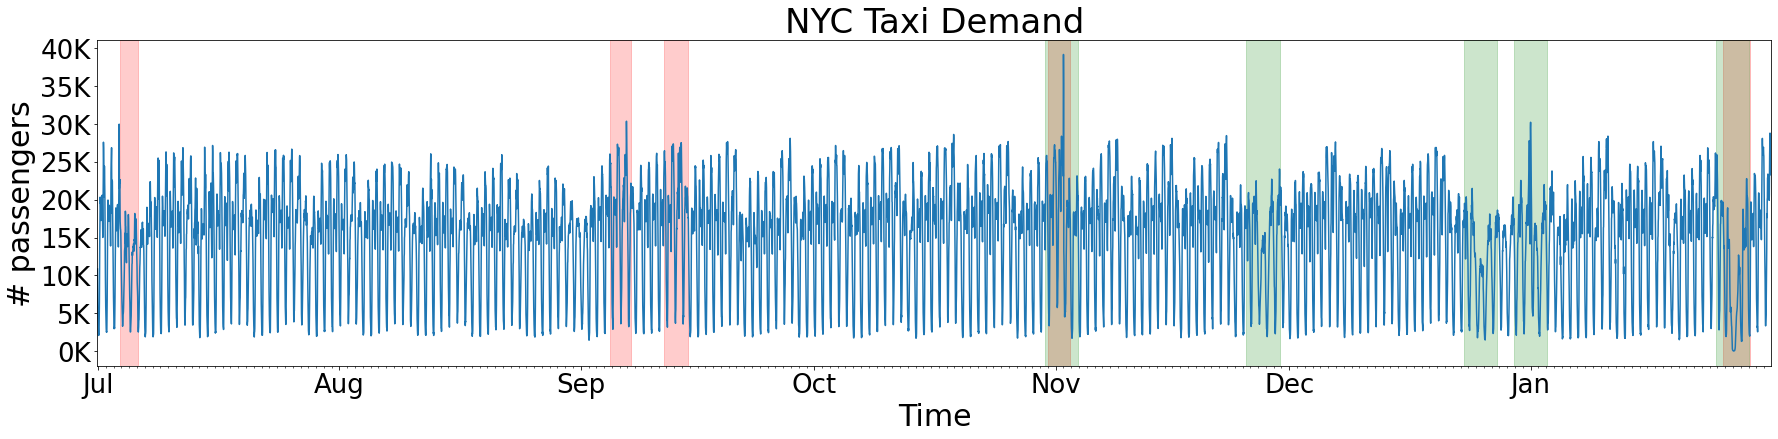

In [ ]:
# visualize the result
anomalies = pd.DataFrame(intervals, columns=['start', 'end', 'score'])
plot(df, [anomalies, known_anomalies])